In [4]:
from deepface import DeepFace
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import os
import scipy.spatial
import sklearn.metrics

In [5]:
list_dir = os.listdir("C:/Users/Public/Documents/DIN_Image/MorphDatabase/1_1/")

In [6]:
len(list_dir)

1220

In [12]:
feature_vectors = []
for i in range(len(list_dir)):
    img1_path = '"C:/Users/Public/Documents/DIN_Image/MorphDatabase/1_1/"' + list_dir[i]
    var = DeepFace.represent(img1_path,model_name = 'ArcFace', enforce_detection = False,detector_backend='retinaface')
    feature_vectors.append(var)
    print(i)

ValueError: ('Confirm that ', '"C:/Users/Public/Documents/DIN_Image/MorphDatabase/1_1/"030380_0M64.JPG', ' exists')

In [9]:
np.savetxt('C:/Users/Public/Documents/Deep_Learner_DIN_Project/Algorithms/Feature_Vector_Extraction/MorphDatabase/1_1/' + 'InsightFACEE'  + '_Feature_Vector.csv', feature_vectors, delimiter = ',')


In [43]:
np.shape(feature_vectors)

(40, 512)

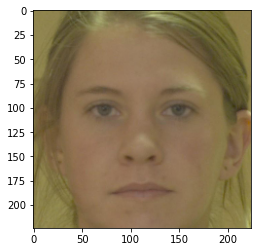

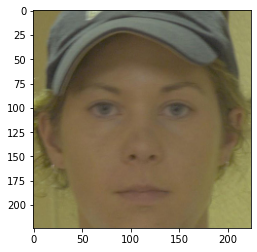

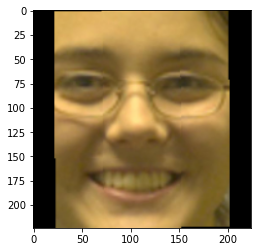

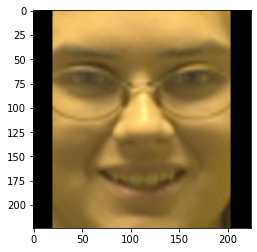

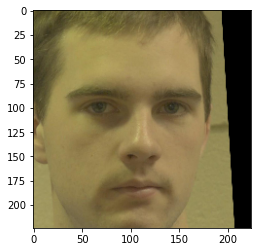

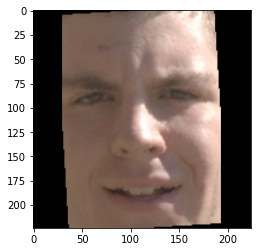

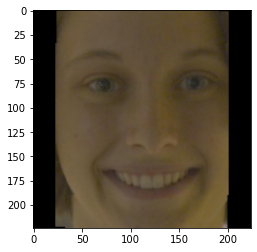

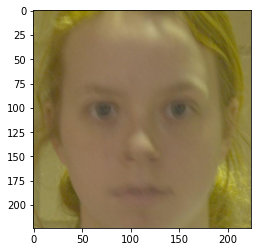

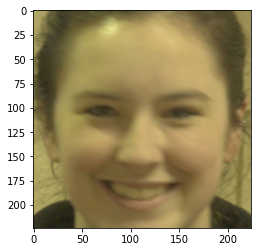

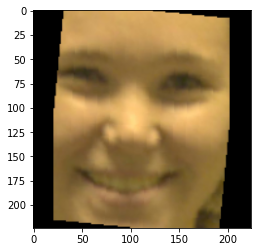

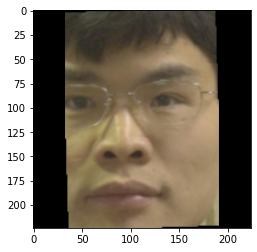

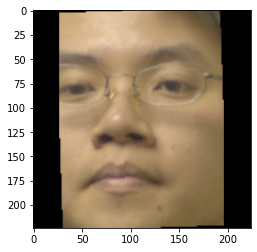

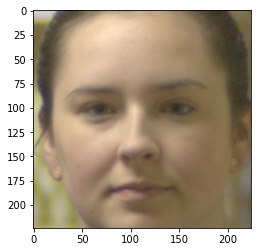

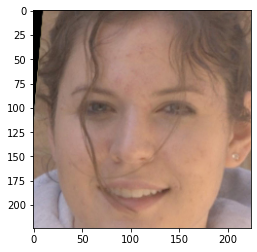

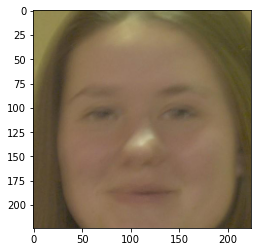

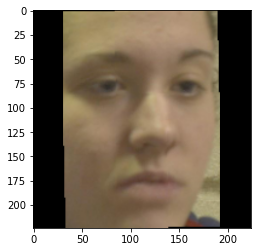

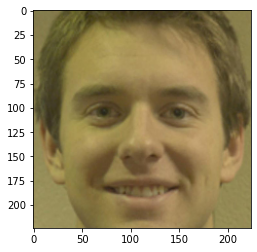

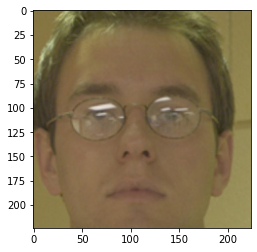

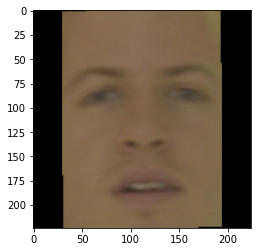

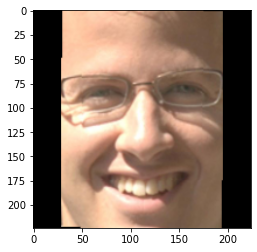

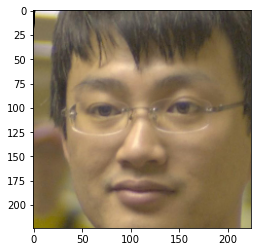

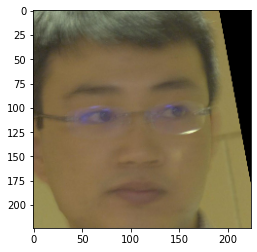

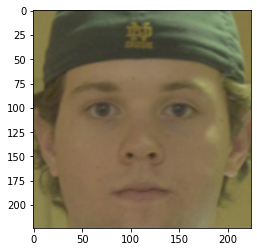

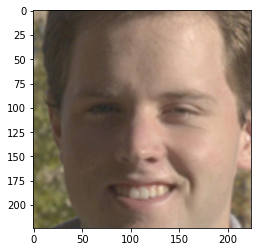

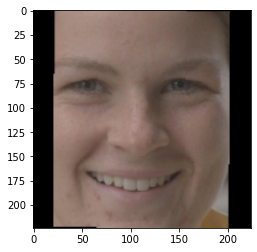

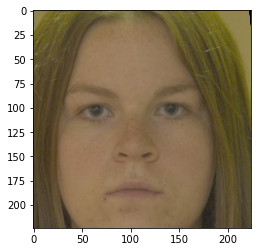

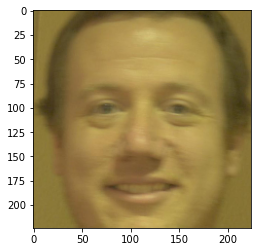

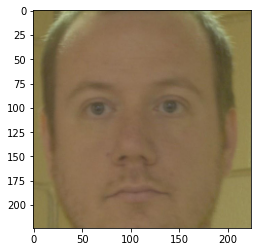

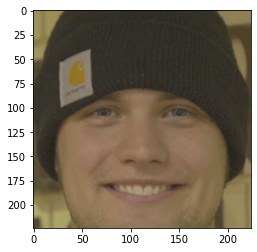

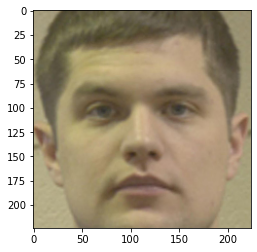

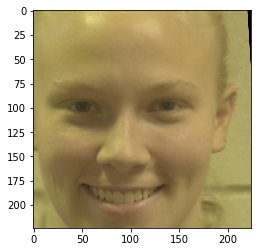

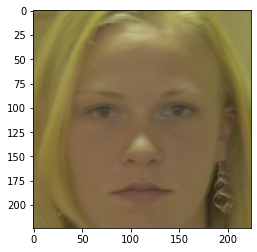

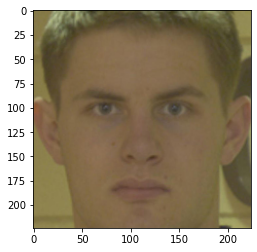

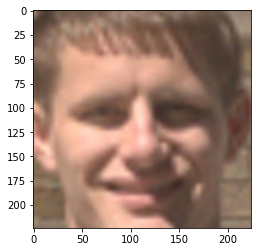

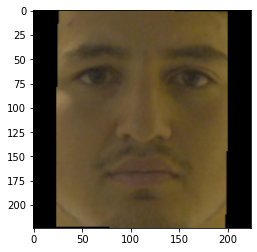

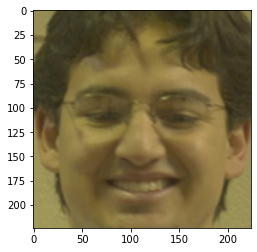

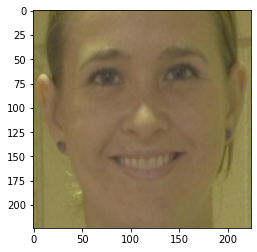

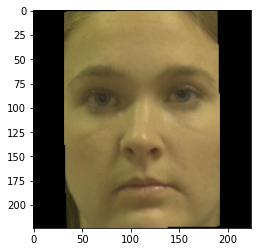

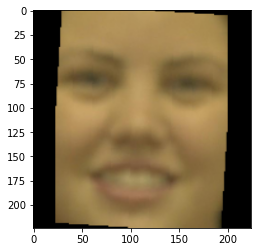

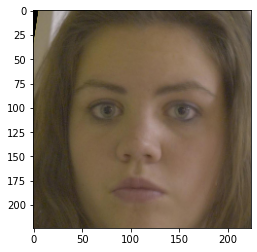

In [44]:
for i in range(len(list_dir)):
    img1_path = 'C:/Users/Public/Documents/PNAS2018Images/CroppedDatabase/' + list_dir[i]
    var = DeepFace.detectFace(img1_path,enforce_detection=False,detector_backend='retinaface')
    plt.figure()
    plt.imshow(var)

In [45]:
euclidean_distances = []
for i in range(0,40,2):
    var1 = scipy.spatial.distance.euclidean(feature_vectors[i],feature_vectors[i+1])
    euclidean_distances.append(var1)

In [46]:
euclidean_distances

[2.764785439327673,
 3.3804687490005514,
 4.456393828654967,
 3.581472377063509,
 4.635594019225846,
 5.806481371556518,
 4.145842884220583,
 3.4564764725451718,
 3.0977894523856744,
 4.036818591604614,
 3.628943821884089,
 3.4649384043496516,
 3.5007644428653286,
 2.907221136947327,
 3.368795552026796,
 4.306694827247053,
 3.560648233514921,
 4.411161520938085,
 3.943683103165542,
 3.8590069549048724]

In [47]:
ground_truth = []

for i in range(8):
    ground_truth.append('different') 

for i in range(12):
    ground_truth.append('same')
    


In [48]:
fpr,tpr,thresholds = sklearn.metrics.roc_curve(ground_truth,np.array(euclidean_distances),pos_label='same')

In [49]:
fpr,tpr,thresholds

(array([0.   , 0.125, 0.375, 0.375, 0.5  , 0.5  , 0.625, 0.625, 0.875,
        0.875, 1.   ]),
 array([0.        , 0.        , 0.        , 0.16666667, 0.16666667,
        0.5       , 0.5       , 0.75      , 0.75      , 1.        ,
        1.        ]),
 array([6.80648137, 5.80648137, 4.45639383, 4.30669483, 4.14584288,
        3.62894382, 3.58147238, 3.4649384 , 3.38046875, 2.90722114,
        2.76478544]))

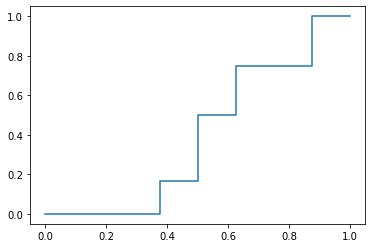

In [50]:
plt.plot(fpr,tpr)

In [51]:
sklearn.metrics.auc(fpr, tpr)

0.3958333333333333